# OUTLIERS AND THEIR IMPACT

In [1]:
import pandas as pd

In [3]:
df=pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df['Age'].isnull().sum()

177

In [6]:
import seaborn as sns

c:\users\milin\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

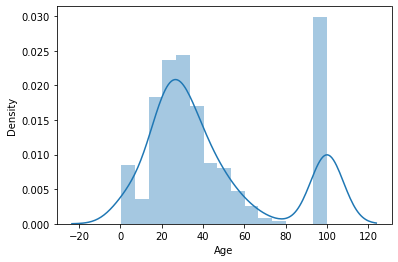

In [12]:
sns.distplot(df['Age'].fillna(100))

Text(0, 0.5, 'Number of Passengers')

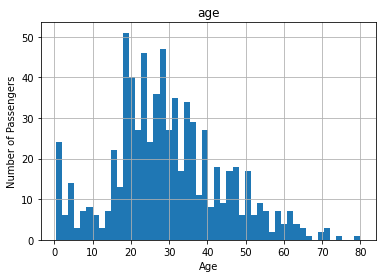

In [15]:
fig=df.Age.hist(bins=50)
fig.set_title('age')
fig.set_xlabel('Age')
fig.set_ylabel('Number of Passengers')

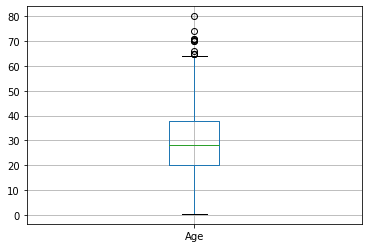

In [16]:
fig=df.boxplot(column='Age')

In [17]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [22]:
#assuming age follows gausian distribution
upper_bound = df['Age'].mean() + 3*df['Age'].std()

lower_bound = df['Age'].mean() - 3*df['Age'].std()

print(upper_bound),print(lower_bound),print(df['Age'].mean())

73.27860964406094
-13.880374349943303
29.69911764705882


(None, None, None)

In [23]:
# computing the inter-quantile range(IQR) i.e. difference between 75percentile and 25 percentile. It is used to define the range outside which outliers lie.
IQR = df.Age.quantile(.75) - df.Age.quantile(.25)

In [24]:
IQR

17.875

In [27]:
lower_bridge = df['Age'].quantile(.25) - (IQR*1.5)
upper_bridge = df['Age'].quantile(.75) + (IQR*1.5)
print(lower_bridge),print(upper_bridge)

-6.6875
64.8125


(None, None)

In [28]:
# extreme outliers
lower_bridge = df['Age'].quantile(.25) - (IQR*3)
upper_bridge = df['Age'].quantile(.75) + (IQR*3)
print(lower_bridge),print(upper_bridge)

-33.5
91.625


(None, None)

### feature is skewed

Text(0, 0.5, 'Number of Passengers')

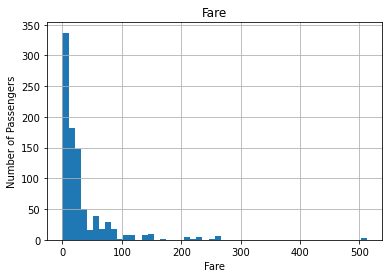

In [29]:
fig=df.Fare.hist(bins=50)
fig.set_title('Fare')
fig.set_xlabel('Fare')
fig.set_ylabel('Number of Passengers')

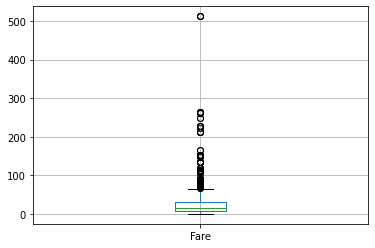

In [30]:
#huge amount of ouliers.
figure = df.boxplot(column="Fare")

In [31]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [32]:
#computing IQR
IQR = df.Fare.quantile(0.75) - df.Fare.quantile(0.25)

In [33]:
lower_bridge = df['Fare'].quantile(.25) - (IQR*1.5)
upper_bridge = df['Fare'].quantile(.75) + (IQR*1.5)
print(lower_bridge),print(upper_bridge)

-26.724
65.6344


(None, None)

In [34]:
#extreme outliers
lower_bridge = df['Fare'].quantile(.25) - (IQR*3)
upper_bridge = df['Fare'].quantile(.75) + (IQR*3)
print(lower_bridge),print(upper_bridge)

-61.358399999999996
100.2688


(None, None)

In [35]:
data=df.copy()

In [37]:
data.loc[data['Age']>=73,'Age']=73

In [38]:
data.loc[data['Fare']>=100, 'Fare']=100

Text(0, 0.5, 'Number of Passengers')

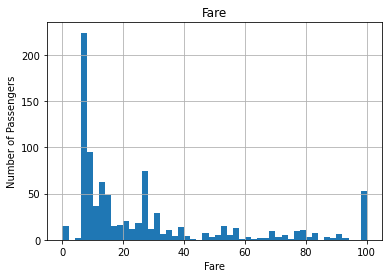

In [39]:
fig=data.Fare.hist(bins=50)
fig.set_title('Fare')
fig.set_xlabel('Fare')
fig.set_ylabel('Number of Passengers')